In [1]:
import spacy
from spacy.matcher import Matcher
import urllib3
import matplotlib.pyplot as plt
%matplotlib inline

nlp = spacy.load("en_core_web_sm") # loads the Spacy library initializes nlp as pipeline object

In [2]:
# function converts .txt url into string text
def getText(url):
    urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
    http = urllib3.PoolManager()
    response = http.request("GET", url)
    return response.data.decode("utf-8")

In [3]:
# ATTEMPT 2


# Created a Matcher Object, which finds matching "patterns" in a Doc Object
assoc_death = ["death", "winter", "ghost","poison","die", "dead", "frost", "untimely","cold"]
pattern = [{"LEMMA":{"IN":assoc_death}}] # created a pattern for all lemmas of words in assoc_death
matcher = Matcher(nlp.vocab) # intialized Matcher object 
assoc_love = ["love","flower","tree","star","summer","saint","worship","blessed","divine","idolatry"]
pattern2 = [{"LEMMA":{"IN":assoc_love}}] # did the same for mentions of love
matcher.add("Love", [pattern2]) # added patterns to the matcher object
matcher.add("Death", [pattern])
class book:
    # created a book class that takes in the title and URL link of the book
    def __init__(self, title, url): 
        self.title = title
        self.raw = getText(url)
        self.doc = nlp(self.raw) # creates a Doc object, which is a list of tokens
        self.sentences = self.doc.sents # creates a list of sentences from the doc
    def get_distance_list(self):
        # returns a list of farthest distances between mentions of love and death
        found_matches = matcher(self.doc)
        distances = []
        current_id = found_matches[0][0]
        current_start = found_matches[0][1]
        for match_id, start, stop in found_matches:
            if match_id != current_id:
                distances.append(start-current_start)
                current_id = match_id
                current_start = start
        return distances
    def get_average_distance(self):
        # takes the average of mentions between love and death
        # matcher object returns a tuple in the following format (match_id,start,stop)
        # match_id determines if the match was a mention of love or death
        distances = self.get_distance_list()
        return sum(distances)/len(distances)
    def scatter_plot(self):
        # returns a scatterplot of all mentions of love and death
        # love is set as 1, death as -1, and neutral is set as 0
        assoc = []
        for token in self.doc: #list comp
            if token.lemma_ in assoc_love:
                assoc.append(1)
            elif token.lemma_ in assoc_death:
                assoc.append(-1)
            else:
                assoc.append(0)
        plt.plot(assoc,"d")
        plt.ylabel("Token Association (1 = Love, -1 = Death, 0 = Neutral)")
        plt.xlabel("Token")
        plt.title(f"Mentions of Love and Death Across {self.title}\n\n",fontsize = 16)
    def compare_to(self,book_list):
        # attempted to create a function that would allow you to compare to a list of books, but didn't work out
        x = [self.title]
        y = [self.get_average_distance()]
        for bk in book_list:
            x.append(bk.title)
            y.append(bk.get_average_distance())
        plt.bar(x, y)
        plt.xlabel("Book Titles")
        plt.ylabel("Average Distance")
        plt.title("Comparison of Average Distances between Mentions of Life and Death in Shakespeare")
        

In [4]:
# created book objects
book1 = book("Macbeth","http://www.gutenberg.org/cache/epub/2264/pg2264.txt")
book2 = book("Romeo and Juliet","http://www.gutenberg.org/cache/epub/1112/pg1112.txt")
book3 = book("Hamlet", "http://www.gutenberg.org/cache/epub/2265/pg2265.txt")
book4 = book("Othello","http://www.gutenberg.org/cache/epub/2267/pg2267.txt")
book5 = book("Julius Caesar", "http://www.gutenberg.org/cache/epub/1785/pg1785.txt")



Text(0.5, 1.0, 'Comparison of Average Distances between \nmentions of life and \ndeath in Shakespeare Books\n')

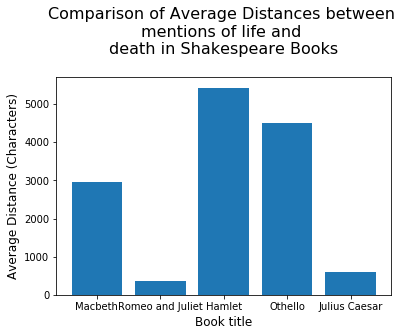

In [6]:
# this is what I wanted the compareTo function to do
x = [book1.title,book2.title,book3.title,book4.title, book5.title]
y = [book1.get_average_distance(),book2.get_average_distance(),book3.get_average_distance(),book4.get_average_distance(), book5.get_average_distance()]

plt.bar(x, y)

plt.xlabel("Book title", fontsize=12)
plt.ylabel("Average Distance (Characters)", fontsize=12)
plt.title("Comparison of Average Distances between \nmentions of life and \ndeath in Shakespeare Books\n", fontsize=16)


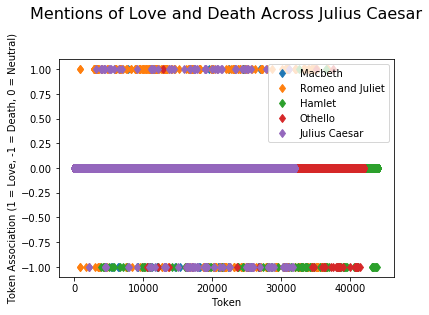

In [8]:
# comparative scatter plot of mentions of love and death across all three books
book_list = [book1,book2,book3,book4,book5]
for book in book_list:
    book.scatter_plot()
plt.legend([book1.title,book2.title,book3.title,book4.title,book5.title])

In [8]:

# Attempt 1 (Failed Attempt)
#class book:
    #def __init__(self, title, url):
        #self.title = title;
        #self.doc = nlp(getText(url))
        #self.raw = getText(url)
        #self.sentences = self.doc.sents
    #def getMostCommonWords(self, num):
        #wordList = []
        #words = []
        #output = ""
        #for token in self.doc:
            #if(token.text in words):
               # wordList[token.text] += 1
#            else:
#                wordList[token.text] = 0
 #       sorted(wordList.items(), key = lambda x:x[1])
  #      wordList2 = list(wordList.keys())
   #     for i in range(0,num):
    #        print(wordList2[i])
#    def findInstancesLove(self, toPrint : bool):
 #       assoc_love = ["love","flower","tree","star","summer","saint","worship","blessed","divine","idolatry"]
 #       p = [{"LEMMA":{"IN":assoc_love}}]
  #      mt = Matcher(nlp.vocab)
   #     mt.add("Love", [p])
  #      matches = mt(self.doc)
   #     if(toPrint):
    #        for match_id, start, end in matches:
 #               print("Match ID, Start, End, Matches")
  #              print(match_id, string_id, start, end, span.text)
#        return matches
 #   def findInstancesDeath(self, toPrint : bool):
  #      assoc_death = ["death", "winter", "ghost","poison","die", "dead", "frost", "untimely","cold"]
   #     p = [{"LEMMA":{"IN":assoc_death}}]
    #    mt = Matcher(nlp.vocab)
#        mt.add("Death", [p])
 #       matches = mt(self.doc)
  #      if(toPrint):
   #         for match_id, start, end in matches:
    #            print("Match ID, Start, End, Matches")
     #           print(match_id, string_id, start, end, span.text)
      #  return matches
        
    

In [ ]:
"love and uahefu uf is os  death"